In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json

In [7]:
def plot_tau_synthetic(
        tau_file,
        ns,
        rs,
        num_of_datasets_per_combination,
        plot_name = 'violin_plot'
    ):
    with open(tau_file) as f:
        tau = json.load(f)
    data = tau
    param = data['param']
    print(param)
    dict_list = []
    for n in ns:
        for r in rs:
            key = f"{int(n*r)}|{n}"
            for m in range(0, num_of_datasets_per_combination):
                dic = {}  # Create a new dictionary for each loop iteration
                dic["n"] = f"$J={n}$"
                dic['r'] = f"{int(r*100)}%"
                dic['tau'] = data[key][m]
                dict_list.append(dic)  # Append the new dictionary
    df = pd.DataFrame(dict_list)
    
    # Create the boxplot
    # Optionally, add a violin plot for better distribution visualization
    if plot_name == 'boxplot':
        g = sns.boxplot(data=df, x="n", y="tau", hue="r", palette="bright",)
    else:
        g = sns.violinplot(data=df, x="n", y="tau", hue="r", palette="bright", 
                       dodge=True, alpha=0.6, linewidth=0)
        
    g.set_ylim(-0.5, 1)

    # Set the x-axis label
    g.set_xlabel("Participant Size", fontsize=14)

    # Set the y-axis label
    g.set_ylabel("Kendall's Tau", fontsize=14)

    # Set the plot title
    g.set_title("Kendall's Tau values across different combinations in synthetic data (KDE-Basic)", fontsize=16)

    # Adjust the legend and move it outside the figure
    plt.legend(title="Healthy Ratio", title_fontsize='13', fontsize='10', 
            bbox_to_anchor=(1.05, 1), loc='upper left')
    
    print(param['num_of_datasets_per_combination'])
    print(param['n_iter'])

    # Add a multi-line caption to the plot
    caption_text = (
        "This figure shows Kendall's Tau for different combinations of participant size and healthy ratio.\n"
        f"Each bombination has {param['num_of_datasets_per_combination']} variants of datasets\n"
        "The results are derived from UCL's KDE_EBM package based on synthetic data of 10 biomarkers.\n"
        f"Number of iterations is {param['n_iter']}."
    )
    g.figure.text(
        0.5, -0.1, caption_text, ha='center', va='top',
        fontsize=12, wrap=True
    )

    # Adjust the layout to make room for the legend
    plt.tight_layout()
    # Show the plot
    plt.show()

In [8]:
tau_file = 'tau_basic.json'
ns = [50, 200, 500]
rs = [0.1, 0.25, 0.5, 0.75, 0.9]
num_of_datasets_per_combination = 50
# data

{'num_of_datasets_per_combination': 50, 'n_iter': 10000, 'n_biomarkers': 10}
50
10000


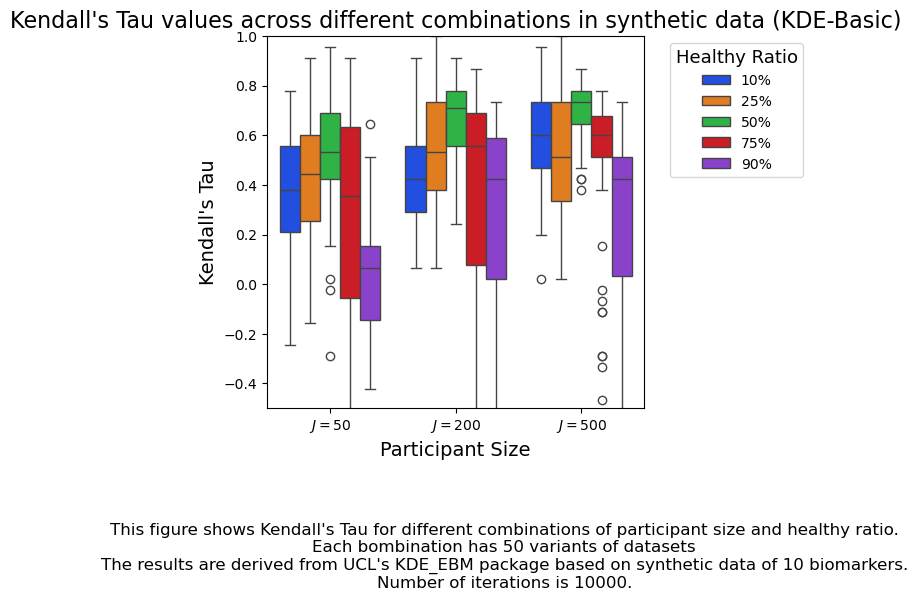

In [9]:
plot_tau_synthetic(
        tau_file,
        ns,
        rs,
        num_of_datasets_per_combination,
        plot_name = 'boxplot'
)

{'num_of_datasets_per_combination': 50, 'n_iter': 10000, 'n_biomarkers': 10}
50
10000


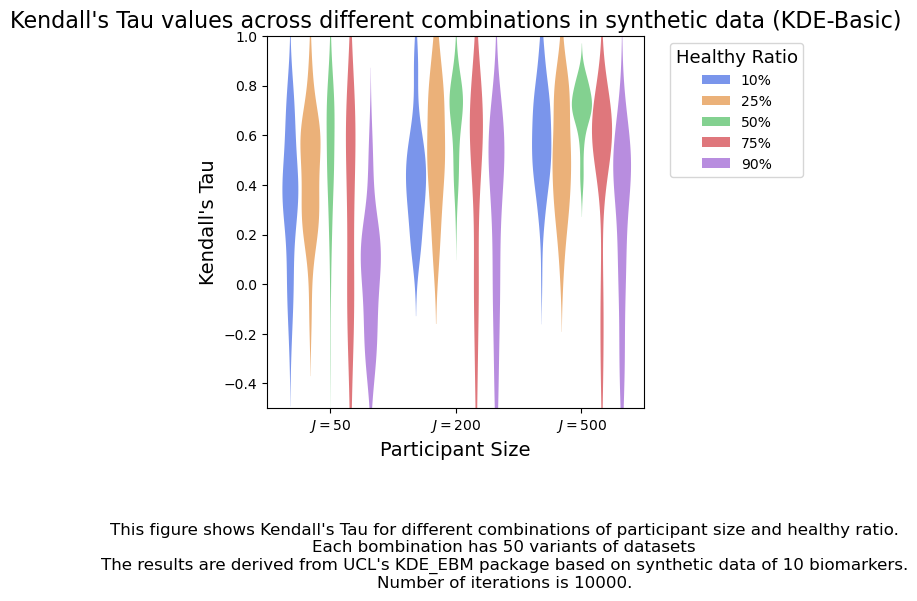

In [10]:
plot_tau_synthetic(
        tau_file,
        ns,
        rs,
        num_of_datasets_per_combination,
        plot_name = 'violin_plot'
)